In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
print(os.listdir())

['.ipynb_checkpoints', 'gender_submission.csv', 'submission_052618.csv', 'test.csv', 'titanic_052518.html', 'Titanic_052518.ipynb', 'Titanic_052618.ipynb', 'titanic_112117.html', 'titanic_112517.html', 'titanic_121217.html', 'train.csv']


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
combine = pd.concat([train.drop(["Survived"], axis=1), test])

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("TRAIN: \n")
print(train.info(), "\n========================================================== \n\nTEST: \n")
print(test.info())

TRAIN: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None 

TEST: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare     

** $\uparrow$ Missing values in "Age", "Fare", "Embarked", "Cabin"**

# Preprocessing
- Drop "PassengerId", "Name", "Ticket"
- Digitize "Sex", "Cabin"
- Fill the NaN in "Embarked", "Age"
- One-hot "Embarked"

In [5]:
train = train.drop(["PassengerId", "Ticket"], axis=1)
train["Sex"] = np.where(train["Sex"]=="female", 1, 0)
train["Cabin"] = np.where(train["Cabin"].isnull()==False, 1, 0)
train["Name"] = train["Name"].apply(lambda x: len(x))

In [6]:
train.loc[train["Embarked"].isnull()==True, :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,19,1,38.0,0,0,80.0,1,NaN
829,1,1,41,1,62.0,0,0,80.0,1,NaN


In [7]:
embark_61 = train.query("Pclass==1 & Sex==1 & 70<Fare<90 & Age < 40")["Embarked"].mode()
embark_829 = train.query("Pclass==1 & Sex==1 & 70<Fare<90 & Age > 50")["Embarked"].mode()
print(embark_61, "\n", embark_829)

0    S
dtype: object 
 0    C
dtype: object


In [8]:
train.loc[train["Embarked"].isnull()==True, "Embarked"] = ["S", "C"]

In [9]:
combine["Sex"] = np.where(combine["Sex"]=="female", 1, 0)
def fill_age(df):
    for pclass in df["Pclass"].unique():
        for sex in df["Sex"].unique():
            for embark in df["Embarked"].unique():
                query_str = "Pclass=={} & Sex=={} & Embarked=='{}'".format(pclass, sex, embark)
                median_age = combine.query(query_str)["Age"].median()
                print("Pclass={}, Sex={}, Embarked={}: median age {}".format(pclass, sex, embark, median_age))
                df.loc[df.query(query_str + "& Age=='NaN'").index.values, "Age"] = median_age
fill_age(train)
train.loc[train["Age"].isnull()==True, :]

Pclass=3, Sex=0, Embarked=S: median age 25.0
Pclass=3, Sex=0, Embarked=C: median age 24.25
Pclass=3, Sex=0, Embarked=Q: median age 25.0
Pclass=3, Sex=1, Embarked=S: median age 22.0
Pclass=3, Sex=1, Embarked=C: median age 15.0
Pclass=3, Sex=1, Embarked=Q: median age 22.0
Pclass=1, Sex=0, Embarked=S: median age 42.0
Pclass=1, Sex=0, Embarked=C: median age 39.0
Pclass=1, Sex=0, Embarked=Q: median age 44.0
Pclass=1, Sex=1, Embarked=S: median age 34.0
Pclass=1, Sex=1, Embarked=C: median age 38.0
Pclass=1, Sex=1, Embarked=Q: median age 35.0
Pclass=2, Sex=0, Embarked=S: median age 29.0
Pclass=2, Sex=0, Embarked=C: median age 29.0
Pclass=2, Sex=0, Embarked=Q: median age 59.0
Pclass=2, Sex=1, Embarked=S: median age 28.0
Pclass=2, Sex=1, Embarked=C: median age 23.0
Pclass=2, Sex=1, Embarked=Q: median age 30.0


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [10]:
train = pd.get_dummies(train, drop_first=True)

- Add "Family"

In [11]:
train["Family"] = train["SibSp"] + train["Parch"]

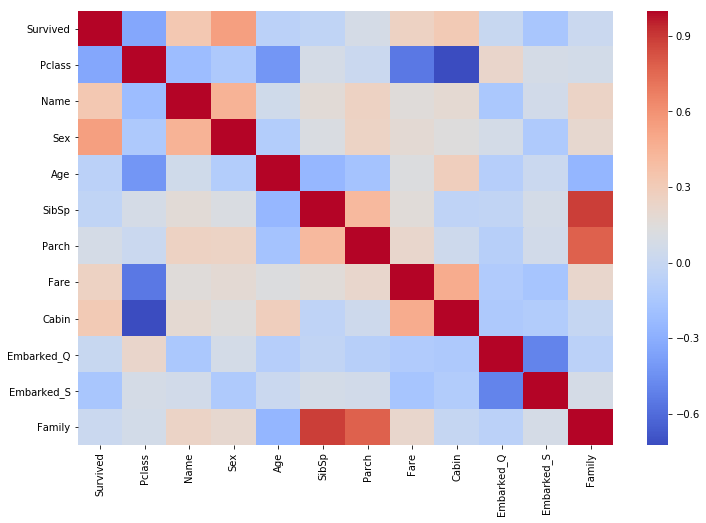

In [12]:
corr = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="coolwarm")

In [13]:
y_train = train["Survived"].values
X_train = train.drop(["Survived"], axis=1).values

**Nonlinear features: "Age", "SibSp"/"Parch"/"Family", "Name"** 

*For Logistic Regresssion Only* 

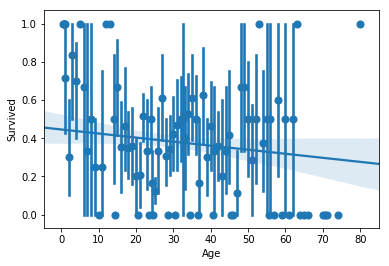

In [14]:
sns.regplot("Age", "Survived", train,
            x_estimator=np.mean)

80.0


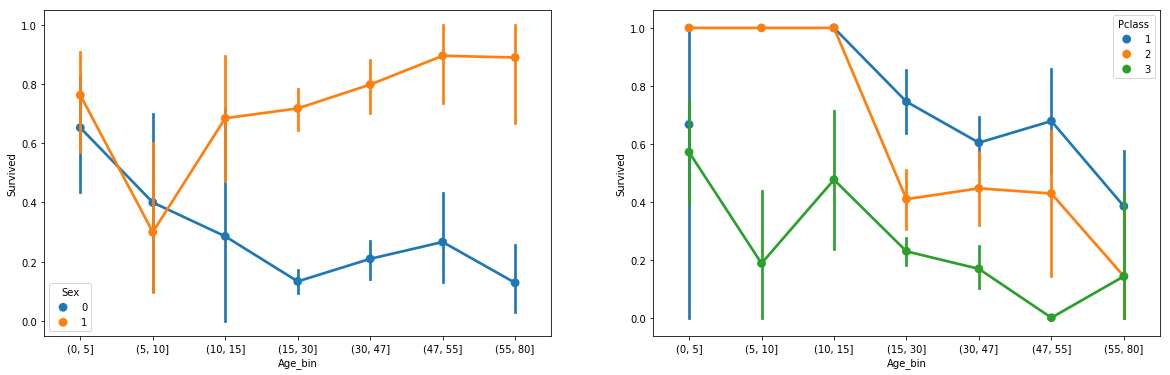

In [15]:
print(combine["Age"].max())
train_log = train.copy()
train_log["Age_bin"] = pd.cut(train_log["Age"], [0, 5, 10, 15, 30, 47, 55, 80])
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.pointplot("Age_bin", "Survived", hue="Sex", data=train_log, ax=axes[0])
sns.pointplot("Age_bin", "Survived", hue="Pclass", data=train_log, ax=axes[1])

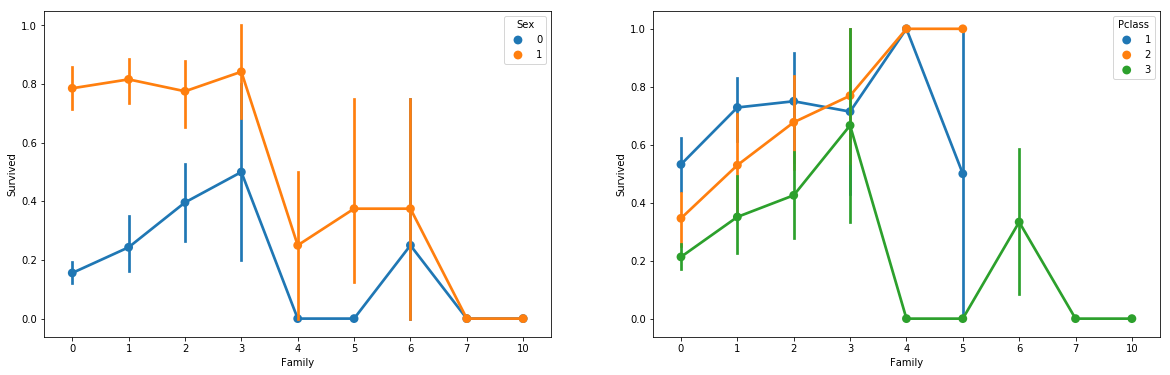

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.pointplot("Family", "Survived", hue="Sex", data=train, ax=axes[0])
sns.pointplot("Family", "Survived", hue="Pclass", data=train, ax=axes[1])

In [17]:
train_log = pd.get_dummies(train_log, drop_first=True)
y_train_log = train_log["Survived"].values
X_train_log = train_log.drop(['Survived'], axis=1).values

# Classifier
- LogisticRegression
- GradientBoostingClassifier
- XGBClassifier

In [44]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [19]:
def print_feature_weight(feature_importances_, df):
    f_weight = ["{:.0%}".format(f) for f in feature_importances_]
    mydict = {}
    for i in np.arange(len(f_weight)):
        mydict[df.columns[i+1]] = f_weight[i]
    display(pd.DataFrame(mydict, index=[0]))

In [20]:
Cs = np.logspace(-3, 3, 7)
logreg_cv = LogisticRegressionCV(Cs, cv=5, max_iter=1000).fit(X_train_log, y_train_log)
print("C: ", logreg_cv.C_)
print("{:.1%}".format(logreg_cv.score(X_train_log, y_train_log)))
print_feature_weight(logreg_cv.coef_[0], train_log)

C:  [10.]
83.2%


,Age,"Age_bin_(10, 15]","Age_bin_(15, 30]","Age_bin_(30, 47]","Age_bin_(47, 55]","Age_bin_(5, 10]","Age_bin_(55, 80]",Cabin,Embarked_Q,Embarked_S,Family,Fare,Name,Parch,Pclass,Sex,SibSp
0,-7%,-151%,-132%,-61%,43%,-130%,6%,60%,4%,-45%,-28%,0%,5%,-3%,-83%,249%,-25%


In [41]:
params = {"n_estimators": (100, 200, 300),
          "max_depth": (3,),
          "learning_rate": (0.1,)}
gb_cv = GridSearchCV(GradientBoostingClassifier(), params, cv=5)
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)
print("{:.1%}".format(gb_cv.best_score_))
print_feature_weight(gb_cv.best_estimator_.feature_importances_, train)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
82.6%


,Age,Cabin,Embarked_Q,Embarked_S,Family,Fare,Name,Parch,Pclass,Sex,SibSp
0,27%,1%,1%,3%,4%,35%,18%,1%,3%,6%,1%
